<a href="https://colab.research.google.com/github/maryem-ahmed/ApplyConceptsofUnsupervised/blob/master/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat


In [5]:
data = loadmat('/content/ex7data2.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011', '__version__': '1.0', '__globals__': [], 'X': array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.0173201

In [6]:
print(data['X'].shape)

(300, 2)


In [7]:
x = data['X']

In [8]:
#function to choose initial centroids
def init_centroids(x,k):
  m,n = x.shape
  centroids = np.zeros((k,n))
  idx = np.random.randint(0,m,k)
  for i in range(k):
    centroids[i,:] = x[idx[i],:]
  return centroids

In [9]:
#choosing centroids
initial_centroids = init_centroids(x,3)
print(initial_centroids)

[[3.1189017  0.69438336]
 [4.95679428 2.89776297]
 [6.23228878 2.72850902]]


In [10]:
#function to find initial centroids
def findClosestCentroids(x, centroids):
    m = x.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    for i in range(m):
      min_distance = 1000000
      for j in range(k):
        distance = np.sum((x[i, :] - centroids[j, :]) ** 2)
        if distance < min_distance:
          min_distance = distance
          idx[i] = j
    return idx

In [11]:
#tring to find closest centroids
idx = findClosestCentroids(x, initial_centroids)
print(idx)

[1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1.
 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1.
 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1.]


In [12]:
#now we have to compute centroids
def computeCentroids(x, idx, k):
  m, n = x.shape
  centroids = np.zeros((k, n))
  for i in range(k):
    indices = np.where(idx == i)
    centroids[i, :] = (np.sum(x[indices, :], axis=1) / len(indices[0])).ravel()
  return centroids


In [13]:
c = computeCentroids(x, idx, 3)
print(c)

[[2.97551561 1.0551894 ]
 [2.72904759 4.55596939]
 [6.41156391 2.95623673]]


In [14]:
def run_KMeans(x, initial_centroids, max_iters):
  m, n = x.shape
  k = initial_centroids.shape[0]
  idx = np.zeros(m)
  centroids = initial_centroids
  for i in range(max_iters):
    idx = findClosestCentroids(x, centroids)
    centroids = computeCentroids(x, idx, k)
  return idx, centroids

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--------------
[[3.1189017  0.69438336]
 [4.95679428 2.89776297]
 [6.23228878 2.728509

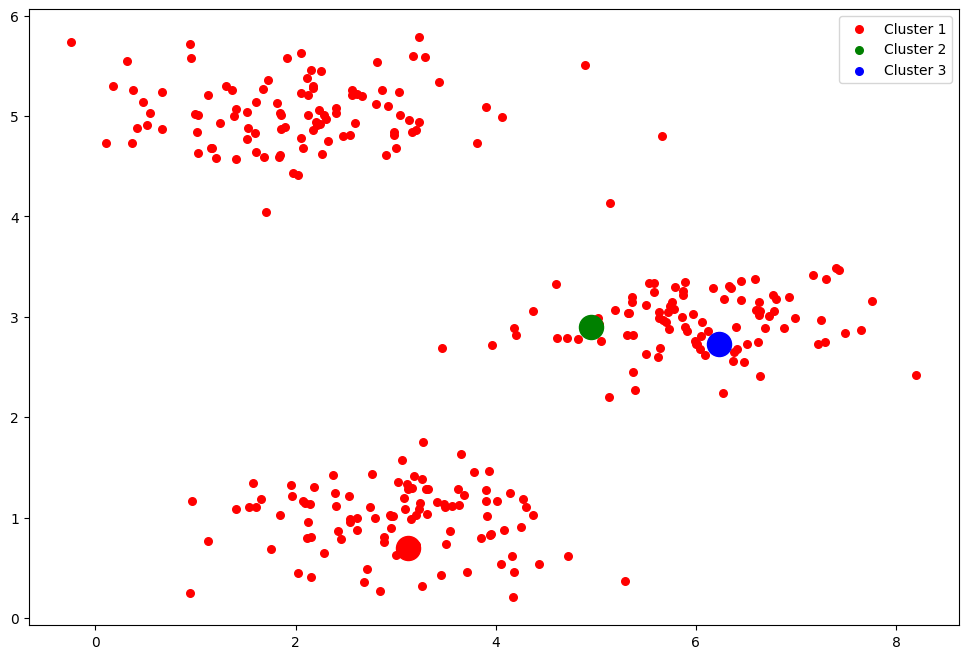

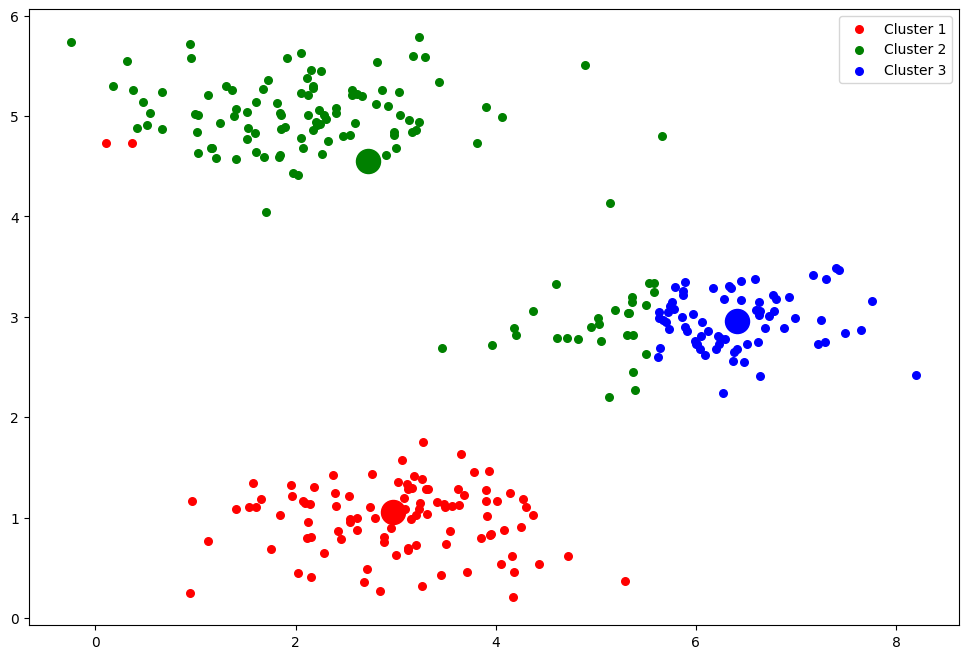

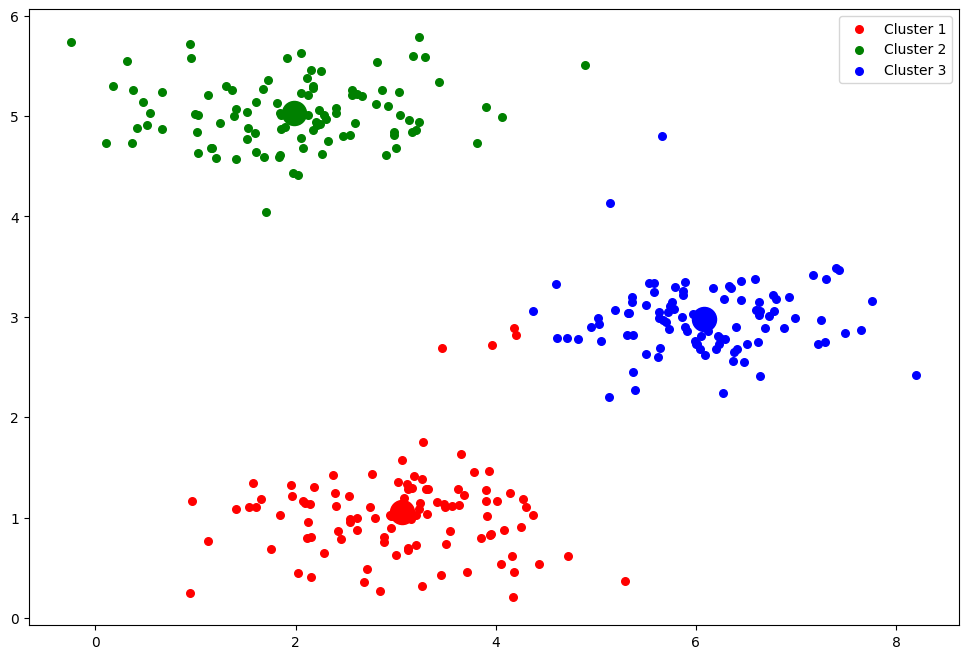

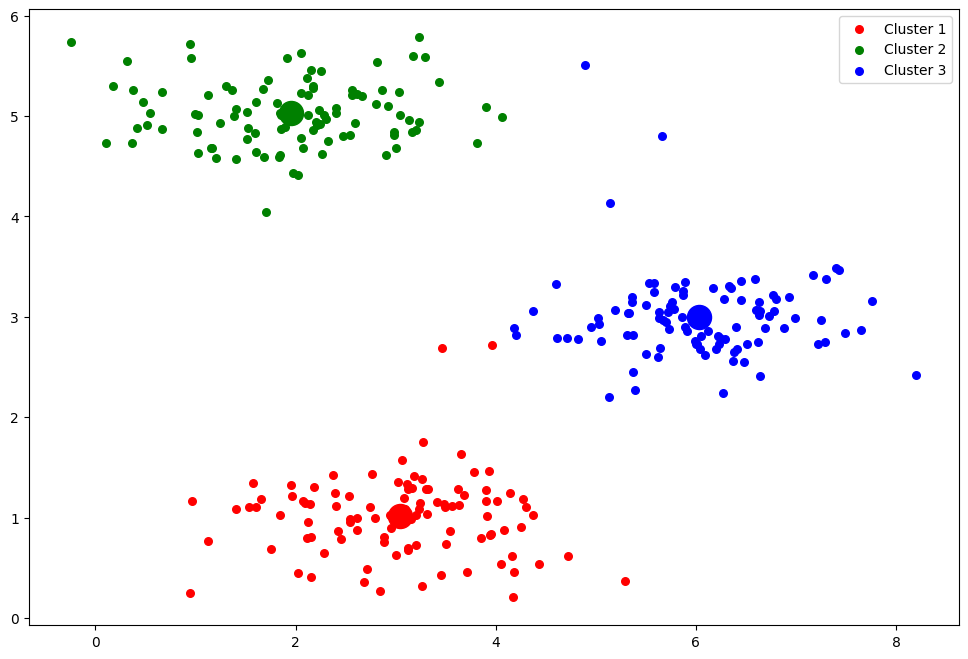

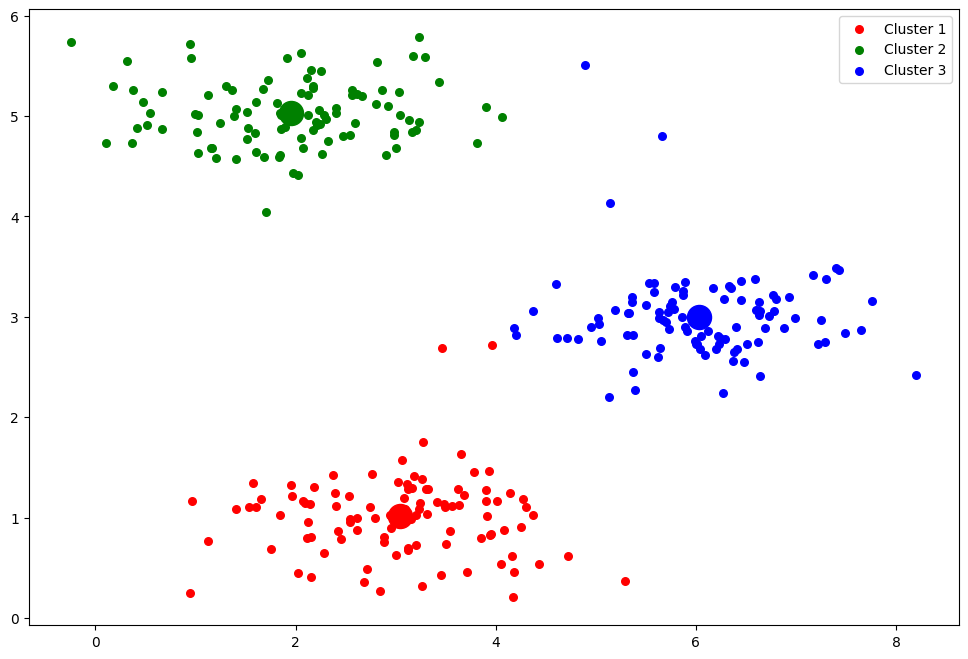

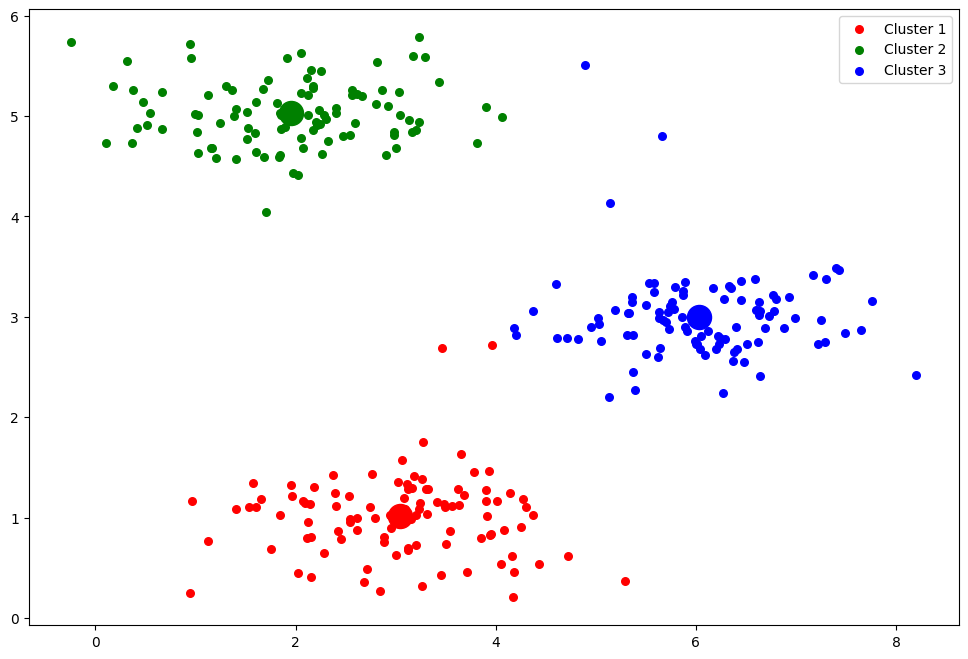

In [15]:
for k in range(6):
  idx,centroids = run_KMeans(x, initial_centroids,k)
  print(idx)
  print('--------------')
  print(centroids)
  cluster1 = x[np.where(idx == 0)[0], :]
  cluster2 = x[np.where(idx == 1)[0], :]
  cluster3 = x[np.where(idx == 2)[0], :]
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.scatter(cluster1[:, 0], cluster1[:, 1], s=30, color='r', label='Cluster 1')
  ax.scatter(centroids[0,0], centroids[0,1], s=300, color='r')
  ax.scatter(cluster2[:, 0], cluster2[:, 1], s=30, color='g', label='Cluster 2')
  ax.scatter(centroids[1,0], centroids[1,1], s=300, color='g')
  ax.scatter(cluster3[:, 0], cluster3[:, 1], s=30, color='b', label='Cluster 3')
  ax.scatter(centroids[2,0], centroids[2,1], s=300, color='b')

  ax.legend()

In [16]:
image_data = loadmat('/content/bird_small.mat')
print(image_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Nov 29 23:36:07 2011', '__version__': '1.0', '__globals__': [], 'A': array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  

In [17]:
## Dimentional Reduction ####

(128, 128, 3)


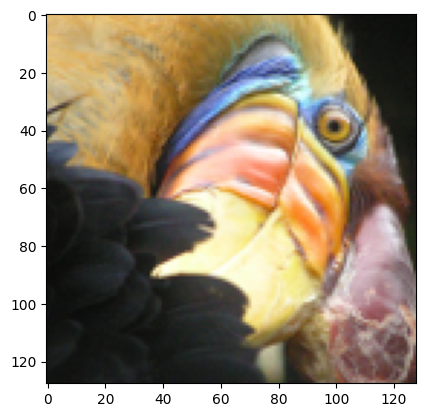

In [18]:
A = image_data['A']
print(A.shape)
plt.imshow(A)

In [19]:
A = A / 255
W = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(W.shape)

(16384, 3)


In [20]:
initial_centroids = init_centroids(W,16)
print(initial_centroids)

[[0.55294118 0.43137255 0.19215686]
 [0.81568627 0.59215686 0.27843137]
 [0.14117647 0.15686275 0.18431373]
 [0.10196078 0.13333333 0.13333333]
 [0.07843137 0.07843137 0.05882353]
 [0.43921569 0.33333333 0.11764706]
 [0.89411765 0.68235294 0.49803922]
 [0.15686275 0.16470588 0.17254902]
 [0.06666667 0.0745098  0.05882353]
 [0.60784314 0.5372549  0.50588235]
 [0.09019608 0.10196078 0.09019608]
 [0.56470588 0.54117647 0.4745098 ]
 [0.81960784 0.63529412 0.32941176]
 [0.19215686 0.15294118 0.12156863]
 [0.49803922 0.36078431 0.14509804]
 [0.99215686 0.99215686 0.84313725]]


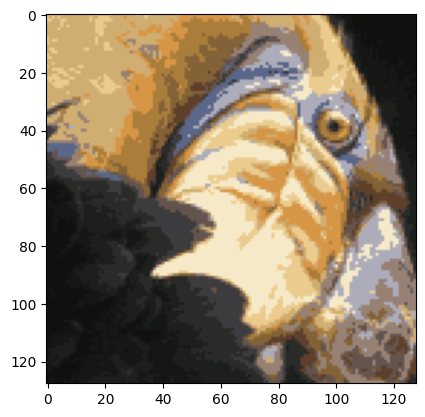

In [21]:
idx , centroids = run_KMeans(W, initial_centroids,10)
idx = findClosestCentroids(W, centroids)
W_recoverd = centroids[idx.astype(int),:]
W_recoverd = np.reshape(W_recoverd, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(W_recoverd)

In [22]:
# Applying PCA
data = loadmat('/content/ex7data1.mat')
print(data)
X = data['X']
print(X.shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011', '__version__': '1.0', '__globals__': [], 'X': array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],


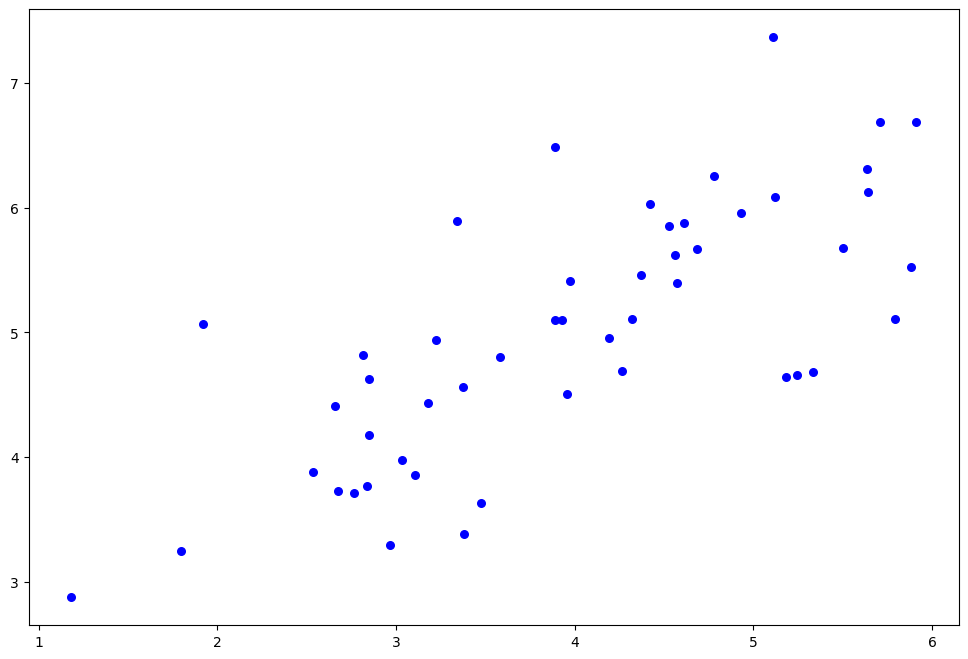

In [23]:
fig , ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1], s=30, color='b')

In [24]:
def pca(X):
  X = (X - X.mean()) / X.std()
  X = np.matrix(X)
  cov = (X.T * X) / X.shape[0]
  U, S, V = np.linalg.svd(cov)
  return U , S , V


In [25]:
U , S, V = pca(X)
print(U)
print(S)
print(V)

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]
[1.43584536 0.56415464]
[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]


In [26]:
def project_data(X, U, k):
  U_reduced = U[:, :k]
  return np.dot(X, U_reduced)

In [27]:
def recover_data(Z, U, k):
  U_reduced = U[:, :k]
  return np.dot(Z, U_reduced.T)

In [28]:
Z = project_data(X, U, 1)
print(Z)
X_recovered = recover_data(Z, U, 1)
print(X_recovered)
print(X_recovered.shape)

[[-4.74689738]
 [-7.15889408]
 [-4.79563345]
 [-4.45754509]
 [-4.80263579]
 [-7.04081342]
 [-4.97025076]
 [-8.75934561]
 [-6.2232703 ]
 [-7.04497331]
 [-6.91702866]
 [-6.79543508]
 [-6.3438312 ]
 [-6.99891495]
 [-4.54558119]
 [-8.31574426]
 [-7.16920841]
 [-5.08083842]
 [-8.54077427]
 [-6.94102769]
 [-8.5978815 ]
 [-5.76620067]
 [-8.2020797 ]
 [-6.23890078]
 [-4.37943868]
 [-5.56947441]
 [-7.53865023]
 [-7.70645413]
 [-5.17158343]
 [-6.19268884]
 [-6.24385246]
 [-8.02715303]
 [-4.81235176]
 [-7.07993347]
 [-5.45953289]
 [-7.60014707]
 [-4.39612191]
 [-7.82288033]
 [-3.40498213]
 [-6.54290343]
 [-7.17879573]
 [-5.22572421]
 [-4.83081168]
 [-7.23907851]
 [-4.36164051]
 [-6.44590096]
 [-2.69118076]
 [-4.61386195]
 [-5.88236227]
 [-7.76732508]]
[[3.76152442 2.89550838]
 [5.67283275 4.36677606]
 [3.80014373 2.92523637]
 [3.53223661 2.71900952]
 [3.80569251 2.92950765]
 [5.57926356 4.29474931]
 [3.93851354 3.03174929]
 [6.94105849 5.3430181 ]
 [4.93142811 3.79606507]
 [5.58255993 4.29728676]

In [29]:
faces = loadmat('/content/ex7faces.mat')
X = faces['X']
print(X.shape)

(5000, 1024)


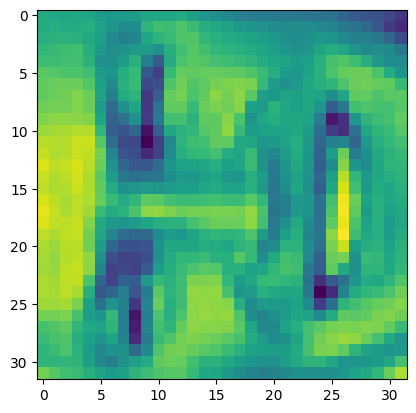

In [30]:
face = np.reshape(X[41,:],(32,32))
plt.imshow(face)

(5000, 100)
(5000, 1024)


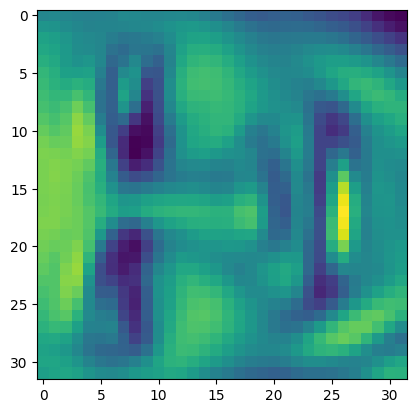

In [31]:
U,S,V = pca(X)
Z = project_data(X, U, 100)
print(Z.shape)
X_recovered = recover_data(Z, U, 100)
print(X_recovered.shape)
face = np.reshape(X_recovered[41,:],(32,32))
plt.imshow(face)